In [98]:
from pathlib import Path
import sys
import pandas as pd
import numpy as np
from IPython.display import display



NA_VALUES = ["---", "--", "", " ", "NA", "N/A"]
# =========================
# FILE FINDER
# =========================
def find_file(name, start=Path.cwd()):
    for ancestor in [start] + list(start.parents):
        matches = list(ancestor.rglob(name))
        if matches:
            return matches[0]
    return None


def find_files(file_map):
    found = {}
    for key, filename in file_map.items():
        path = find_file(filename)
        if path:
            found[key] = path
        else:
            print(f"[WARNING] File not found: {filename}")
    return found

eda_script_path = find_file("script_eda.py")
if eda_script_path is None:
    raise FileNotFoundError("❌ script_eda.py tidak ditemukan di parent directory")

# tambahkan BASE PROJECT ke sys.path
sys.path.append(str(eda_script_path.parent))

# sekarang bisa import
from script_eda import evaluate_dataset, extract_column_schema,find_internal_duplicate_columns,extract_single_schema,cek_value_data_column








In [99]:
path_ndvi = find_file("indeks_ndvi_id.csv")

if path_ndvi is None:
    raise FileNotFoundError("❌ File merged tidak ditemukan")

df_ndvi = pd.read_csv(path_ndvi, na_values=NA_VALUES)

df_ndvi.head()

,tanggal,stasiun_id,ndvi,id
0,2009-12-19,DKI5,0.3801,2009-12-19_DKI5
1,2010-01-01,DKI5,0.3705,2010-01-01_DKI5
2,2010-01-17,DKI5,0.4848,2010-01-17_DKI5
3,2010-02-02,DKI5,0.5710,2010-02-02_DKI5
4,2010-02-18,DKI5,0.4308,2010-02-18_DKI5


In [100]:
path_cuaca = find_file("cuaca_harian_dki_id.csv")

if path_cuaca is None:
    raise FileNotFoundError("❌ File merged tidak ditemukan")

df_cuaca = pd.read_csv(path_cuaca, na_values=NA_VALUES)

df_cuaca.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),temperature_2m_mean (°C),relative_humidity_2m_mean (%),...,cloud_cover_min (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h),surface_pressure_max (hPa),surface_pressure_min (hPa),lokasi,lokasi_clean,id
0,2010-01-01,29.4,24.4,4.0,14.0,16.0,246,16.24,26.6,81,...,99,21.0,10.5,11.9,6.9,1009.3,1005.1,dki1_bundaranhi,DKI1,2010-01-01_DKI1
1,2010-01-02,30.8,24.0,6.5,4.0,14.7,238,19.80,26.9,82,...,91,16.5,7.7,9.0,4.4,1009.9,1006.0,dki1_bundaranhi,DKI1,2010-01-02_DKI1
2,2010-01-03,30.4,24.3,7.6,11.0,12.6,244,17.32,26.7,83,...,81,18.4,9.4,11.9,6.5,1010.5,1006.5,dki1_bundaranhi,DKI1,2010-01-03_DKI1
3,2010-01-04,30.3,25.4,0.9,5.0,19.3,239,20.43,27.4,81,...,17,23.8,13.5,14.4,9.6,1009.1,1005.1,dki1_bundaranhi,DKI1,2010-01-04_DKI1
4,2010-01-05,29.9,24.8,14.3,7.0,15.9,247,15.86,26.4,83,...,99,21.6,11.1,10.4,7.8,1009.1,1006.0,dki1_bundaranhi,DKI1,2010-01-05_DKI1


In [101]:
path_ispu = find_file("ispu_all_years_max_handled.csv")

if path_ispu is None:
    raise FileNotFoundError("❌ File merged tidak ditemukan")

df_ispu = pd.read_csv(path_ispu, na_values=NA_VALUES)

df_ispu[df_ispu['id'] == '2021-12-03_DKI1']




,tanggal,periode_data,stasiun,pm_sepuluh,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,id
9949,2021-12-03,202112,DKI1 (Bunderan HI),49.0,9.0,19.0,7.0,49.0,49.0,PM10,BAIK,2021-12-03_DKI1


In [102]:
df_ispu["kategori"].unique()
df_ispu.shape

(15259, 12)

In [103]:
df = df_ispu.copy()
print("Master rows:", len(df))

df = df.merge(
    df_cuaca,
    on='id',
    how='left'
)
print("After merging cuaca rows:", len(df))
df.head()


Master rows: 15259
After merging cuaca rows: 15259


,tanggal,periode_data,stasiun,pm_sepuluh,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,...,cloud_cover_max (%),cloud_cover_min (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h),surface_pressure_max (hPa),surface_pressure_min (hPa),lokasi,lokasi_clean
0,2010-01-01,201001,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,...,100.0,99.0,21.0,10.5,11.9,6.9,1009.3,1005.1,dki1_bundaranhi,DKI1
1,2010-01-02,201001,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,O3,...,100.0,91.0,16.5,7.7,9.0,4.4,1009.9,1006.0,dki1_bundaranhi,DKI1
2,2010-01-03,201001,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,PM10,...,100.0,81.0,18.4,9.4,11.9,6.5,1010.5,1006.5,dki1_bundaranhi,DKI1
3,2010-01-04,201001,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,PM10,...,100.0,17.0,23.8,13.5,14.4,9.6,1009.1,1005.1,dki1_bundaranhi,DKI1
4,2010-01-05,201001,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,PM10,...,100.0,99.0,21.6,11.1,10.4,7.8,1009.1,1006.0,dki1_bundaranhi,DKI1


In [104]:
df = df.merge(
    df_ndvi[['id', 'ndvi']],
    on='id',
    how='left'
)

df = df.sort_values(['stasiun', 'tanggal'])
df['ndvi'] = df.groupby('stasiun')['ndvi'].ffill()


In [105]:
df = df.sort_values(['stasiun', 'tanggal'])

df['ndvi'] = (
    df.groupby('stasiun')['ndvi']
      .ffill()
      .bfill()
)


In [106]:
print("Final rows:", len(df))
print("NDVI missing ratio:", df['ndvi'].isna().mean())


Final rows: 15259
NDVI missing ratio: 0.0


In [107]:
df = df[~df['id'].isin(["2020-10-31_0", "2022-05-31_0"])]
df = df.sort_values(by='tanggal', ascending=True)


In [108]:
df.isna().sum()


tanggal                            0
periode_data                       0
stasiun                            0
pm_sepuluh                         0
sulfur_dioksida                    0
karbon_monoksida                   0
ozon                               0
nitrogen_dioksida                  0
max                                0
parameter_pencemar_kritis          0
kategori                           0
id                                 0
time                               0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
precipitation_sum (mm)             0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
shortwave_radiation_sum (MJ/m²)    0
temperature_2m_mean (°C)           0
relative_humidity_2m_mean (%)      0
cloud_cover_mean (%)               0
surface_pressure_mean (hPa)        0
wind_gusts_10m_max (km/h)          0
winddirection_10m_dominant (°)     0
relative_humidity_2m_max (%)       0
r

In [109]:
from pathlib import Path

# =========================
# OUTPUT DIRECTORY
# =========================
OUTPUT_DIR = Path.cwd() / "datasets"
OUTPUT_DIR.mkdir(exist_ok=True)

# =========================
# EXPORT TO CSV
# =========================
output_path = OUTPUT_DIR / "merged_cuaca_ndvi_ispu.csv"

df.to_csv(output_path, index=False)

print(f"✅ File berhasil diexport ke:\n{output_path}")


✅ File berhasil diexport ke:
c:\Users\USER\Desktop\DATAVIDIA\penyisihan-datavidia-10\models\datasets\merged_cuaca_ndvi_ispu.csv


In [110]:
df.tail()

,tanggal,periode_data,stasiun,pm_sepuluh,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,...,cloud_cover_min (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h),surface_pressure_max (hPa),surface_pressure_min (hPa),lokasi,lokasi_clean,ndvi
15255,2025-08-31,202508,DKI2 Kelapa Gading,28.0,45.0,16.0,21.0,16.0,45.0,SO2,...,8.0,19.0,5.9,7.2,0.8,1011.5,1007.4,dki2_kelapagading,DKI2,0.2276
15256,2025-08-31,202508,DKI3 Jagakarsa,28.0,53.0,8.0,19.0,39.0,53.0,SO2,...,5.0,14.0,4.5,3.2,0.4,1004.1,1000.4,dki3_jagakarsa,DKI3,0.4797
15254,2025-08-31,202508,DKI1 Bundaran Hotel Indonesia HI,42.0,29.0,12.0,15.0,24.0,42.0,PM10,...,6.0,15.3,4.7,4.3,1.0,1011.6,1007.8,dki1_bundaranhi,DKI1,0.4940
15257,2025-08-31,202508,DKI4 Lubang Buaya,47.0,27.0,10.0,18.0,17.0,47.0,PM10,...,7.0,14.2,5.1,4.0,0.9,1008.1,1004.4,dki4_lubangbuaya,DKI4,0.5774
15258,2025-08-31,202508,DKI5 Kebon Jeruk,37.0,25.0,9.0,21.0,34.0,37.0,PM10,...,8.0,14.5,3.6,2.5,0.2,1010.7,1006.9,dki5_kebonjeruk,DKI5,0.4526


In [113]:
from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()
df_corr["kategori_enc"] = LabelEncoder().fit_transform(df_corr["kategori"])


In [114]:
numeric_cols = df_corr.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop("kategori_enc")

corr_target = df_corr[numeric_cols].corrwith(df_corr["kategori_enc"])


In [115]:
corr_target_sorted = corr_target.sort_values(ascending=False)
print(corr_target_sorted)

pm_sepuluh                         0.551042
max                                0.446000
ozon                               0.298803
temperature_2m_max (°C)            0.287407
nitrogen_dioksida                  0.266187
temperature_2m_mean (°C)           0.226670
shortwave_radiation_sum (MJ/m²)    0.223490
sulfur_dioksida                    0.222926
ndvi                               0.167929
karbon_monoksida                   0.127227
periode_data                       0.076159
relative_humidity_2m_max (%)       0.036715
surface_pressure_max (hPa)        -0.016995
surface_pressure_mean (hPa)       -0.020526
surface_pressure_min (hPa)        -0.034743
temperature_2m_min (°C)           -0.087041
cloud_cover_max (%)               -0.096874
precipitation_sum (mm)            -0.161611
relative_humidity_2m_mean (%)     -0.172693
wind_speed_10m_max (km/h)         -0.203575
precipitation_hours (h)           -0.212343
wind_gusts_10m_max (km/h)         -0.229615
cloud_cover_mean (%)            

C:\Users\USER\AppData\Local\Temp\ipykernel_32296\70186293.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


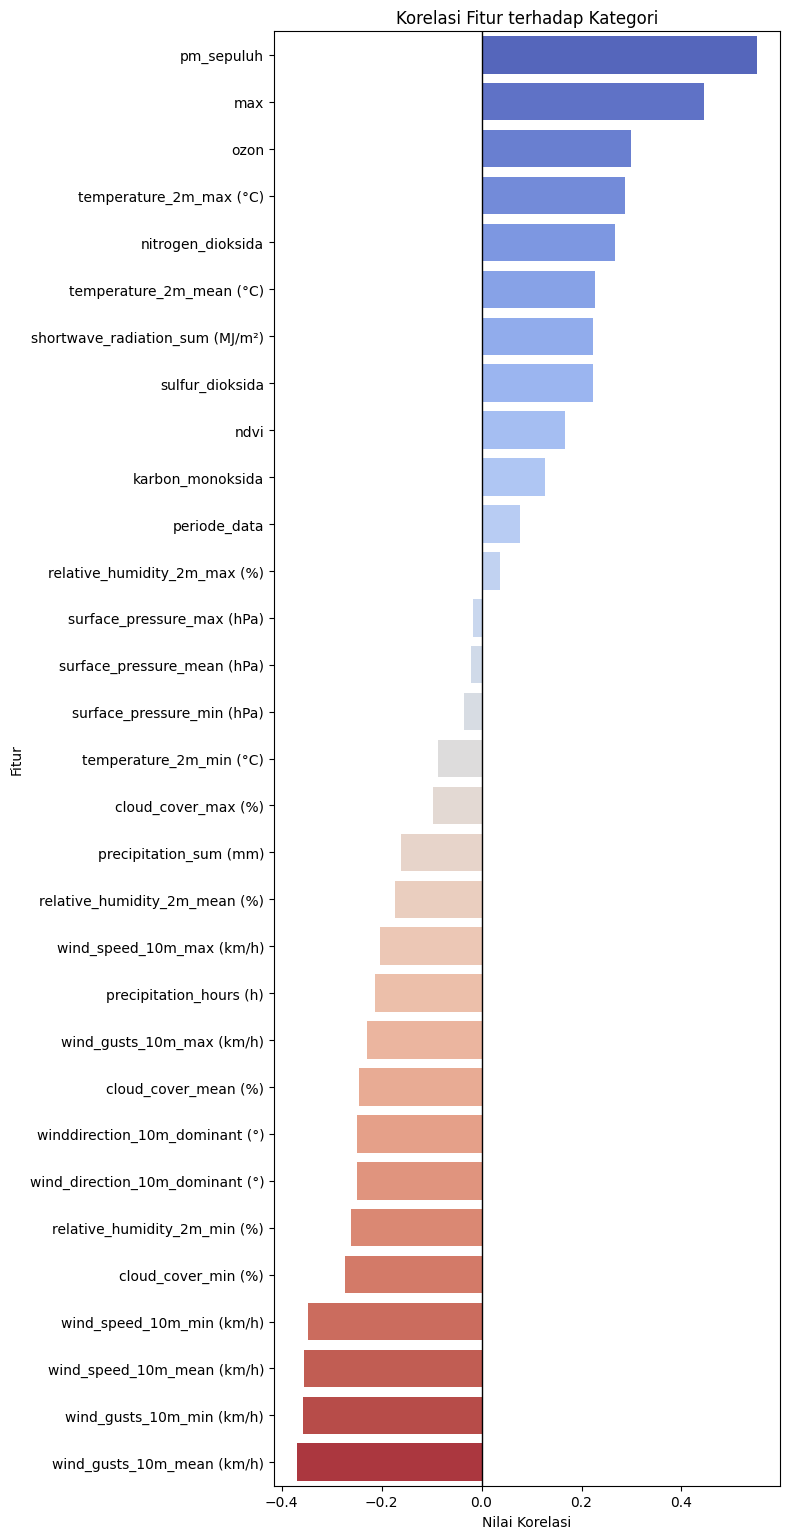

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, len(corr_target_sorted) * 0.5))
sns.barplot(
    x=corr_target_sorted.values,
    y=corr_target_sorted.index,
    palette="coolwarm"
)

plt.axvline(0, color="black", linewidth=1)
plt.title("Korelasi Fitur terhadap Kategori")
plt.xlabel("Nilai Korelasi")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()
